In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import h5py
import scanpy as sc
from sklearn.discriminant_analysis import StandardScaler
import umap
from sklearn.metrics import mean_squared_error, r2_score

/Users/emilyguan/miniforge3/envs/openpose/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def perform_pca(n_components, data):
    '''Fit and transform data to its PCs, then calculate MSE of the reconstructed data'''
    # for idx, n in enumerate(n_components):
    pca = PCA(n_components)

    # Transform the data to its principal components
    data_pca = pca.fit_transform(data)

    explained_var_ratio = pca.explained_variance_ratio_
    cumulative_var_ratio = np.cumsum(explained_var_ratio)
    print("Data shape after PCA transformation:", data_pca.shape)
    print("Explained variance ratio:", explained_var_ratio)
    print("Cumulative variance ratio:", cumulative_var_ratio)
    
    reconstructed_data = pca.inverse_transform(pca.transform(data))
    # MSE
    mse = np.mean((data - reconstructed_data) ** 2)
    print("MSE:", mse)

    return data_pca #, explained_var_ratio, cumulative_var_ratio, mse



# Human Data PCA

In [3]:
human_anndata = sc.read('anndata_human.h5ad')
human_data = human_anndata.X
print("Data shape:", human_data.shape)
# Transpose the data to have cells as rows and genes as columns
human_data = human_data.T  # Now rows are cells and columns are genes

human_metadata = pd.read_csv('Trevino_meta.csv', index_col=0)
print(human_metadata.head())

Data shape: (15469, 43340)
         x
1    GluN5
2    GluN4
3    GluN4
4  Late_RG
5    GluN3


In [16]:
# Color Map for human labels
# Combine GluN* labels into 'GluN' and *RG labels into 'RG'
human_labels = human_metadata['x'].replace(regex={r'^GluN.*': 'GluN', r'^.*RG$': 'RG'})
# Get unique combined labels
unique_human_labels = np.unique(human_labels)
human_color_map = plt.get_cmap('tab10') 

In [4]:
human_scaler = StandardScaler()
human_data_scaled = human_scaler.fit_transform(human_data)

In [17]:
h_transf_4 = perform_pca(n_components=4, data=human_data_scaled)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for label in unique_human_labels:
    mask = (human_labels == label)
    axs[0, 0].scatter(h_transf_4[mask, 0], h_transf_4[mask, 1], label=label, color=human_color_map(np.where(unique_human_labels == label)[0]), s=3)
    axs[0, 0].set_title("PC1 vs PC2")
    axs[0, 0].legend(fontsize=6)
    axs[0, 1].scatter(h_transf_4[mask, 1], h_transf_4[mask, 2], label=label, color=human_color_map(np.where(unique_human_labels == label)[0]), s=3)
    axs[0, 1].set_title("PC2 vs PC3")
    axs[0, 1].legend(fontsize=6)
    axs[1, 0].scatter(h_transf_4[mask, 2], h_transf_4[mask, 3], label=label, color=human_color_map(np.where(unique_human_labels == label)[0]), s=3)
    axs[1, 0].set_title("PC3 vs PC4")
    axs[1, 0].legend(fontsize=6)
    axs[1, 1].scatter(h_transf_4[mask, 0], h_transf_4[mask, 3], label=label, color=human_color_map(np.where(unique_human_labels == label)[0]), s=3)
    axs[1, 1].set_title("PC1 vs PC4")
    axs[1, 1].legend(fontsize=6)
plt.show()

Data shape after PCA transformation: (43340, 4)
Explained variance ratio: [0.03859433 0.0140782  0.00765599 0.00514118]
Cumulative variance ratio: [0.03859433 0.05267253 0.06032852 0.0654697 ]


In [12]:
# UMAP on PCA output
h_transf_4_array = np.vstack(h_transf_4)
umap_h4 = umap.UMAP(n_neighbors=5, metric = "cosine") 
umap_embedding_h4 = umap_h4.fit_transform(h_transf_4_array)

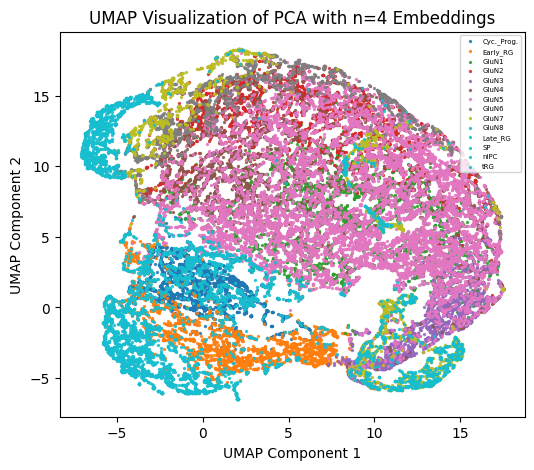

In [14]:
plt.figure(figsize=(6, 5))
for i, label in enumerate(unique_human_labels):
    mask = (human_labels == label)
    plt.scatter(umap_embedding_h4[mask, 0], umap_embedding_h4[mask, 1], color=human_color_map(i), label=label, alpha=0.8, s=2)
plt.legend(fontsize=5)

plt.title('UMAP Visualization of PCA with n=4 Embeddings')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

Data shape after PCA transformation: (43340, 10)
Explained variance ratio: [0.03859433 0.0140782  0.00765599 0.00514118 0.00412914 0.00321466
 0.0021594  0.00180466 0.00160026 0.00142067]
Cumulative variance ratio: [0.03859433 0.05267253 0.06032852 0.0654697  0.06959883 0.07281349
 0.07497289 0.07677755 0.0783778  0.07979847]
MSE: 0.8772520475534115


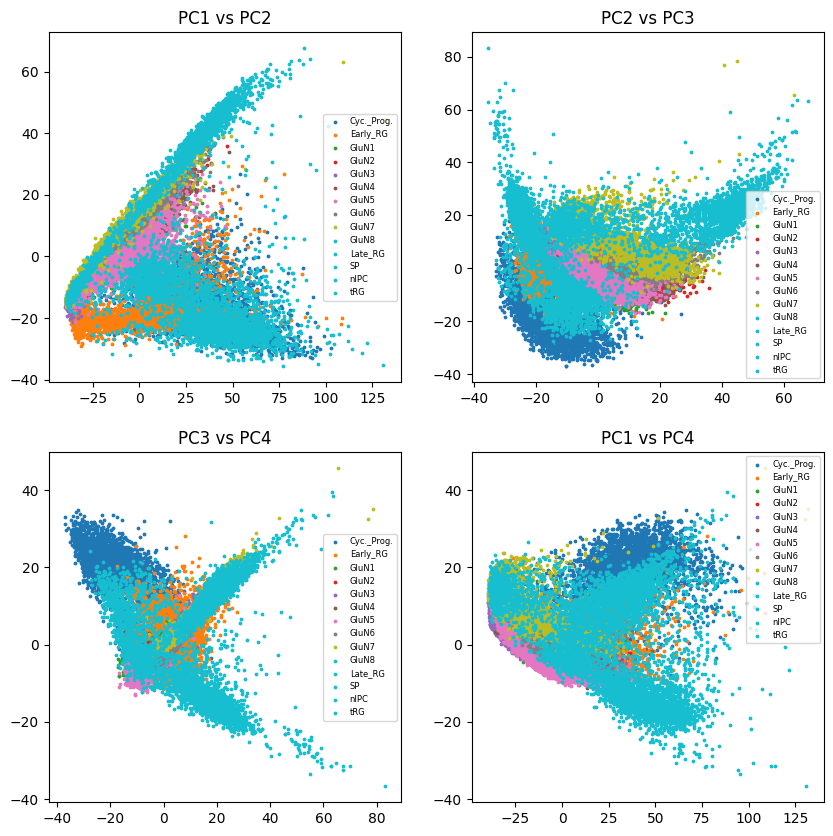

In [15]:
# n = 10
h_transf_10 = perform_pca(n_components=10, data=human_data_scaled)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for label in unique_human_labels:
    mask = (human_labels == label)
    axs[0, 0].scatter(h_transf_10[mask, 0], h_transf_10[mask, 1], label=label, color=human_color_map(np.where(unique_human_labels == label)[0]), s=3)
    axs[0, 0].set_title("PC1 vs PC2")
    axs[0, 0].legend(fontsize=6)
    axs[0, 1].scatter(h_transf_10[mask, 1], h_transf_10[mask, 2], label=label, color=human_color_map(np.where(unique_human_labels == label)[0]), s=3)
    axs[0, 1].set_title("PC2 vs PC3")
    axs[0, 1].legend(fontsize=6)
    axs[1, 0].scatter(h_transf_10[mask, 2], h_transf_10[mask, 3], label=label, color=human_color_map(np.where(unique_human_labels == label)[0]), s=3)
    axs[1, 0].set_title("PC3 vs PC4")
    axs[1, 0].legend(fontsize=6)
    axs[1, 1].scatter(h_transf_10[mask, 0], h_transf_10[mask, 3], label=label, color=human_color_map(np.where(unique_human_labels == label)[0]), s=3)
    axs[1, 1].set_title("PC1 vs PC4")
    axs[1, 1].legend(fontsize=6)
plt.show()

In [ ]:
# UMAP on PCA n=10 output
h_transf_10_array = np.vstack(h_transf_10)
umap_h10 = umap.UMAP(n_neighbors=5, metric = "cosine") 
umap_embedding_h10 = umap_h10.fit_transform(h_transf_10_array)

plt.figure(figsize=(6, 5))
for i, label in enumerate(unique_human_labels):
    mask = (human_labels == label)
    plt.scatter(umap_embedding_h4[mask, 0], umap_embedding_h4[mask, 1], color=human_color_map(i), label=label, alpha=0.8, s=2)
plt.legend(fontsize=5)

plt.title('UMAP Visualization of PCA with n=4 Embeddings')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

# Monkey Data PCA

In [5]:
# def read_data(datafile='Trevino.h5'): #! old, used h5
#     with h5py.File(datafile, 'r') as f:
#         expr_data = f['human_data/block1_values'][:] # contains ['human_data']
#         print("Expression data read:", expr_data.shape)

#     anndata = sc.AnnData(X=expr_data) # Convert expr data to Anndata for scanpy
#     print("AnnData shape:", anndata)
#     with h5py.File(datafile, 'r') as f:
#         cell_names = f['human_data/axis0'][1:].astype(str) # Add cell names
 
#     anndata.var_names = cell_names # adding cell names along columns to Anndata

#     return anndata.X # expression data as numpy array


print("Reading data...")
anndata = sc.read('anndata_monkey.h5ad')
monkey_data = anndata.X
print("Data shape:", monkey_data.shape)
# Transpose the data to have cells as rows and genes as columns
monkey_data = monkey_data.T  # Now rows are cells and columns are genes
monkey_data

Reading data...
Data shape: (15469, 70407)


array([[2.7407114 , 4.01399322, 5.0553127 , ..., 0.        , 0.        ,
        0.        ],
       [1.62990813, 4.19952246, 4.94531992, ..., 0.        , 0.        ,
        0.        ],
       [1.60688282, 3.71045522, 5.3581123 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.63812926, 3.2948744 , 3.96931128, ..., 0.        , 0.        ,
        0.        ],
       [2.6357209 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.5064448 , 3.15795837, 4.62841152, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
# Scale: ensure that each feature (gene expression) contributes equally to the PCA
scaler = StandardScaler()
monkey_data_scaled = scaler.fit_transform(monkey_data)


In [10]:
monkey_metadata = pd.read_csv('Micali_meta.csv', index_col=0)
monkey_metadata.head()

,x
Unnamed: 0,
1,IPC
2,IPC
3,ExN
4,ExN
5,ExN


In [11]:
labels = monkey_metadata['x']
unique_monkey_labels = np.unique(labels)
color_map = plt.get_cmap('tab10') 

In [22]:
transformed_data4 = plot_pca(n_components=4, data=monkey_data_scaled)

Data shape after PCA transformation: (70407, 4)
Explained variance ratio: [0.00838702 0.00782262 0.0045057  0.00317452]
Cumulative variance ratio: [0.00838702 0.01620964 0.02071533 0.02388985]


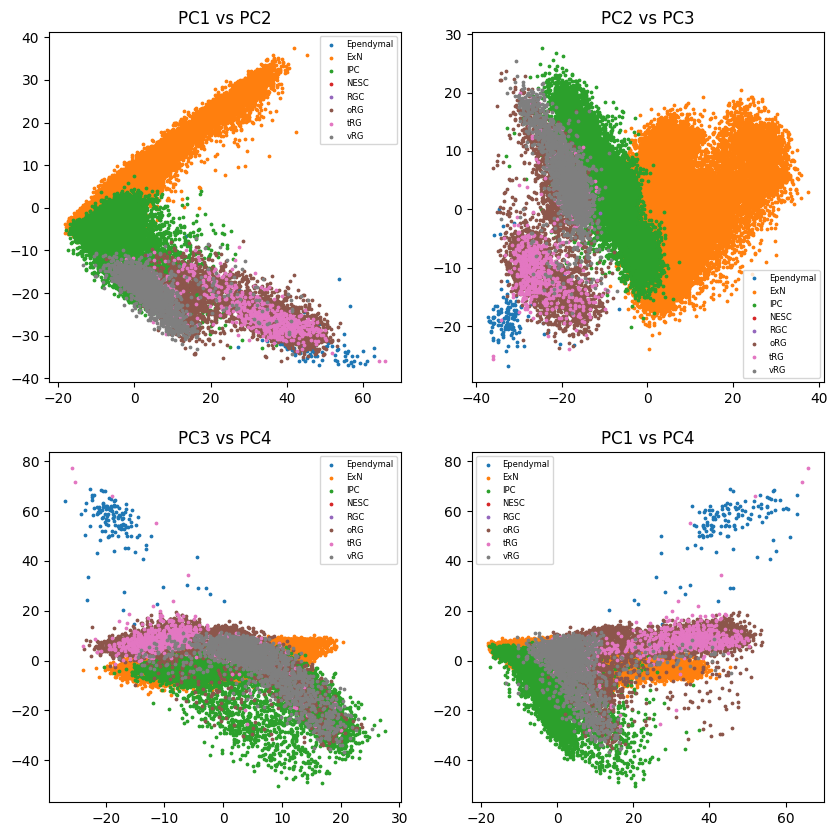

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for label in unique_monkey_labels:
    mask = (labels == label)
    axs[0, 0].scatter(transformed_data4[mask, 0], transformed_data4[mask, 1], label=label, color=color_map(np.where(unique_monkey_labels == label)[0]), s=3)
    axs[0, 0].set_title("PC1 vs PC2")
    axs[0, 0].legend(fontsize=6)
    axs[0, 1].scatter(transformed_data4[mask, 1], transformed_data4[mask, 2], label=label, color=color_map(np.where(unique_monkey_labels == label)[0]), s=3)
    axs[0, 1].set_title("PC2 vs PC3")
    axs[0, 1].legend(fontsize=6)
    axs[1, 0].scatter(transformed_data4[mask, 2], transformed_data4[mask, 3], label=label, color=color_map(np.where(unique_monkey_labels == label)[0]), s=3)
    axs[1, 0].set_title("PC3 vs PC4")
    axs[1, 0].legend(fontsize=6)
    axs[1, 1].scatter(transformed_data4[mask, 0], transformed_data4[mask, 3], label=label, color=color_map(np.where(unique_monkey_labels == label)[0]), s=3)
    axs[1, 1].set_title("PC1 vs PC4")
    axs[1, 1].legend(fontsize=6)
plt.show()

In [28]:
transformed_data20 = plot_pca([20])

Data shape after PCA transformation: (70407, 20)
Explained variance ratio: [0.00838702 0.00782262 0.0045057  0.00317452 0.00294768 0.00145236
 0.0012223  0.00105759 0.00091934 0.00077629 0.00057582 0.00052829
 0.00047899 0.00046713 0.00044043 0.00036328 0.00033702 0.00032793
 0.00032413 0.00028734]
Cumulative variance ratio: [0.00838702 0.01620964 0.02071533 0.02388985 0.02683754 0.0282899
 0.02951219 0.03056978 0.03148912 0.03226541 0.03284123 0.03336952
 0.03384851 0.03431564 0.03475607 0.03511935 0.03545637 0.0357843
 0.03610843 0.03639577]


In [13]:
transformed_data100 = plot_pca(100, monkey_data)

Data shape after PCA transformation: (70407, 100)
Explained variance ratio: [0.02146057 0.01695755 0.01545001 0.00628846 0.0036503  0.00328822
 0.00267419 0.00202349 0.00177135 0.00152404 0.00143511 0.00108232
 0.00096406 0.00087575 0.00084072 0.0008111  0.00074278 0.00069947
 0.00066488 0.00063663 0.00061531 0.00060283 0.00058292 0.00057322
 0.00055381 0.00053384 0.00052745 0.00051296 0.00049568 0.00048696
 0.00048374 0.00047844 0.00047237 0.00047018 0.00046527 0.00046127
 0.00045797 0.00045631 0.00045478 0.00045183 0.00045125 0.00044983
 0.00044534 0.00044468 0.00044311 0.00044176 0.00044104 0.00044018
 0.00043921 0.00043748 0.00043655 0.00043624 0.00043453 0.00043379
 0.00043152 0.00043067 0.00042945 0.00042927 0.00042773 0.00042686
 0.00042638 0.00042563 0.00042488 0.00042438 0.00042272 0.00042231
 0.00042145 0.00042069 0.00042035 0.00041965 0.00041749 0.00041652
 0.00041595 0.00041541 0.00041428 0.00041379 0.00041274 0.00041242
 0.0004111  0.00041064 0.00041032 0.00040793 0.000407

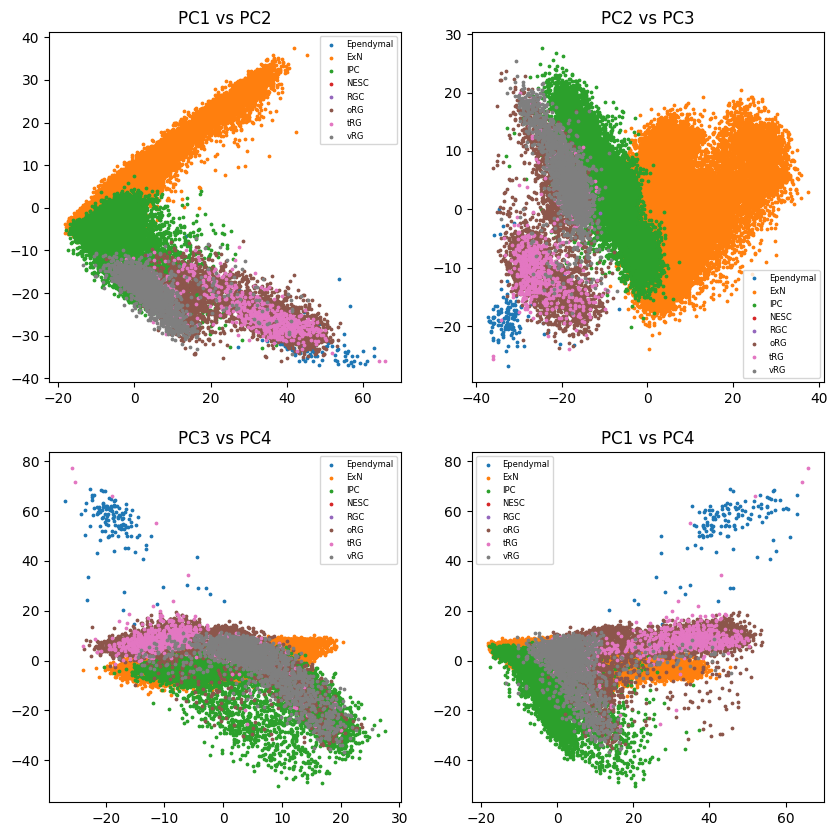

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for label in unique_labels:
    mask = (labels == label)
    axs[0, 0].scatter(transf_data100[mask, 0], transf_data100[mask, 1], label=label, color=color_map(np.where(unique_labels == label)[0]), s=3)
    axs[0, 0].set_title("PC1 vs PC2")
    axs[0, 0].legend(fontsize=6)
    axs[0, 1].scatter(transf_data100[mask, 1], transf_data100[mask, 2], label=label, color=color_map(np.where(unique_labels == label)[0]), s=3)
    axs[0, 1].set_title("PC2 vs PC3")
    axs[0, 1].legend(fontsize=6)
    axs[1, 0].scatter(transf_data100[mask, 2], transf_data100[mask, 3], label=label, color=color_map(np.where(unique_labels == label)[0]), s=3)
    axs[1, 0].set_title("PC3 vs PC4")
    axs[1, 0].legend(fontsize=6)
    axs[1, 1].scatter(transf_data100[mask, 0], transf_data100[mask, 3], label=label, color=color_map(np.where(unique_labels == label)[0]), s=3)
    axs[1, 1].set_title("PC1 vs PC4")
    axs[1, 1].legend(fontsize=6)
# plt.legend()
plt.show()